In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import random

In [ ]:
# 1
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv")
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


In [ ]:
class Polynomial_Regression:
    def __init__(self, data = None, polynomial_degree = 1):
        self.polynomial_degree = polynomial_degree
        self.data = data
        
    def poly_fit(self, X, Y):
      # Original X and Y
        self.X = np.array(X).reshape(-1, 1) 
        self.Y = np.array(Y).reshape(-1, 1)
      # Process X
        self.X_process = np.copy(self.X)
        if self.polynomial_degree > 1:
            for i in range(2, self.polynomial_degree + 1):
                X_i = self.X**i 
                self.X_process = np.concatenate((self.X_process, X_i), axis = 1)
        elif self.polynomial_degree == 1:
            pass 
        elif self.polynomial_degree == 0:
            self.X_process = [0] * self.X_process.shape[0]
        # Add ones column to X 
        self.X_process = np.insert(self.X_process, 0, [1] * self.X_process.shape[0], axis = 1)
        # W = (X^TX)^-1 X^T y
        self.W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self.X_process), self.X_process)), np.transpose(self.X_process)), self.Y)
    
    def ridge_fit(self, alpha, X, Y):
        self.X = np.array(X).reshape(-1, 1) 
        self.Y = np.array(Y).reshape(-1, 1) 
        self.X_process = np.copy(self.X)
        if self.polynomial_degree > 1:
            for i in range(2, self.polynomial_degree + 1):
                X_i = self.X**i 
                self.X_process = np.concatenate((self.X_process, X_i), axis = 1)
        elif self.polynomial_degree == 1:
            pass 
        elif self.polynomial_degree == 0:
            self.X_process = [0] * self.X_process.shape[0]

        self.X_process = np.insert(self.X_process, 0, [1] * self.X_process.shape[0], axis = 1)
        self.W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self.X_process), self.X_process)+(alpha*np.identity(self.Y.shape[0]))), np.transpose(self.X_process)), self.Y)
    
    def predict(self, x_new):
        self.x_new = np.array(x_new).reshape(-1, 1)
        self.x_new_process = np.copy(self.x_new)
        if self.polynomial_degree > 1:
            for i in range(2, self.polynomial_degree + 1):
                X_i = self.x_new**i 
                self.x_new_process = np.concatenate((self.x_new_process, X_i), axis = 1)
        elif self.polynomial_degree == 1:
            pass 
        self.x_new_process = np.insert(self.x_new_process, 0, [1] * self.x_new_process.shape[0], axis = 1)
        self.Y_hat = np.dot(self.x_new_process, self.W)
        return self.Y_hat
    
    def coeff(self):
        return self.W
    
    def plot(self):
        plt.scatter(self.X, self.Y, s = 50, edgecolors='black')
        plt.plot(self.X, self.Y_hat, color = 'green',lw=2)
        plt.show()
    
    def plot_2(self):
        plt.figure(figsize= (8, 4))
        plt.scatter(self.X, self.Y, s = 50, edgecolors='black')
        plt.plot(self.x_new, self.Y_hat, color = 'green', lw=2)
        plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * (np.linspace(0, 1, 100))))
        plt.show()

    def mse(self):
        return sum([(y_s - y_pred)**2 for y_s, y_pred in zip(self.Y, self.Y_hat)])*(1/len(self.Y))

In [ ]:
class Ridge:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, X, y):
        leftmat = np.linalg.inv(X.T @ X + self.alpha * np.identity(y.shape[1]))
        self.betas = leftmat @ X.T @ y
    
    def predict(self, X):
        return X @ self.betas

In [ ]:
poly_example = Polynomial_Regression(data, 2)

In [ ]:
poly_example.poly_fit(data["Diện tích"], data["Giá nhà"])

In [ ]:
poly_example.predict(data["Diện tích"])

array([[ -99.99908082],
       [-190.7248871 ],
       [-269.79780933],
       [-337.21784751],
       [-392.98500165],
       [-437.09927175],
       [-469.56065781],
       [-490.36915981],
       [-499.52463985],
       [-497.02785653],
       [-482.87818916],
       [-457.07563775],
       [-419.6202023 ],
       [-370.5118828 ],
       [-309.75067926],
       [-237.33659168],
       [-153.26962004],
       [ -57.54976437],
       [  49.82297535],
       [ 168.84859911],
       [ 299.52710692],
       [ 441.85849878],
       [ 595.83615397],
       [ 761.47283116],
       [ 938.76239238],
       [1127.70483765],
       [1328.30016697],
       [1540.54838033],
       [1764.44947773],
       [2000.00345918]])

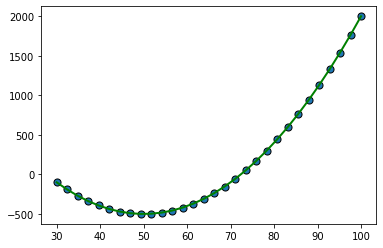

In [ ]:
poly_example.plot()

In [ ]:
poly_example.W

array([[ 2.00000579e+03],
       [-1.00000222e+02],
       [ 1.00000199e+00]])

In [5]:
def generateData(N,std):
    X = np.linspace(0,1,N)
    mu = np.sin(2.0*np.pi*X)
    if(std > 0):
        T = np.random.normal(mu,std)
    else:
        T = mu
    return [X, T]

In [ ]:
x_data, y_data = generateData(10, 0.5)

In [ ]:
ex2 = Polynomial_Regression(polynomial_degree = 9)

In [ ]:
ex2.poly_fit(x_data, y_data)

In [ ]:
x_test = np.linspace(0, 1, 100)

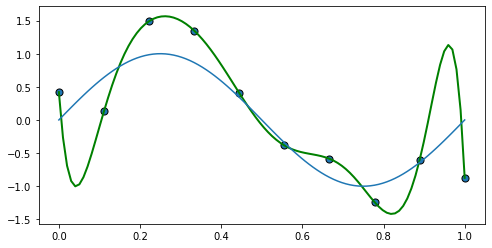

In [ ]:
ex2.predict(x_test)
ex2.plot_2()

With 10 training datas and degree equals to 9, the model is overfitting

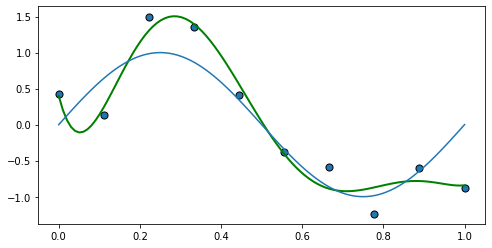

In [ ]:
ex2 = Polynomial_Regression(polynomial_degree = 6)
ex2.poly_fit(x_data, y_data)
x_test = np.linspace(0, 1, 100)
ex2.predict(x_test)
ex2.plot_2()

With 10 training datas and degree equals to 6, the model is slightly overfitting

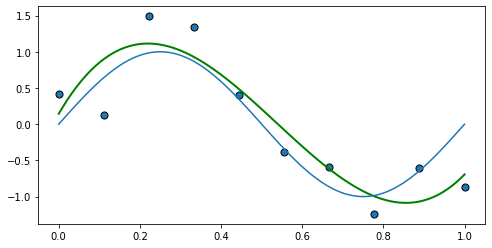

In [ ]:
ex2 = Polynomial_Regression(polynomial_degree = 3)
ex2.poly_fit(x_data, y_data)
x_test = np.linspace(0, 1, 100)
ex2.predict(x_test)
ex2.plot_2()

With 10 training datas and degree equals to 3, the model seems to be good

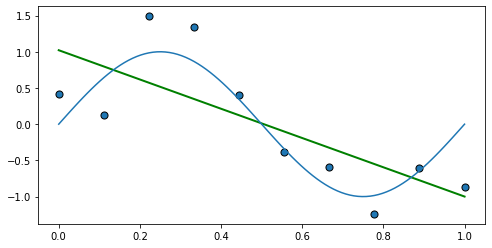

In [ ]:
ex2 = Polynomial_Regression(polynomial_degree = 1)
ex2.poly_fit(x_data, y_data)
x_test = np.linspace(0, 1, 100)
ex2.predict(x_test)
ex2.plot_2()

With 10 training datas and degree equals to 1, the model is underfitting

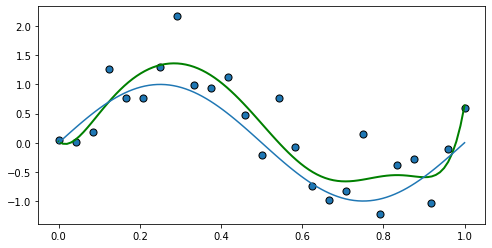

In [ ]:
# Add 15 datas into training set
x_data, y_data = generateData(25, 0.5)
ex2 = Polynomial_Regression(polynomial_degree = 9)
ex2.poly_fit(x_data, y_data)
x_test = np.linspace(0, 1, 100)
ex2.predict(x_test)
ex2.plot_2()

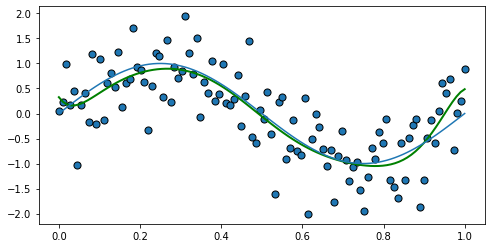

In [ ]:
# Add 100 datas into training set
x_data, y_data = generateData(110, 0.5)
ex2 = Polynomial_Regression(polynomial_degree = 9)
ex2.poly_fit(x_data, y_data)
x_test = np.linspace(0, 1, 100)
ex2.predict(x_test)
ex2.plot_2()

In [ ]:
# Using Ridge Regression with 10 trainig datas
x_data, y_data = generateData(10, 0.5)

In [ ]:
ex2 = Polynomial_Regression(polynomial_degree = 9)
ex2.ridge_fit(0.0007, x_data, y_data)
x_test = np.linspace(0, 1, 100)

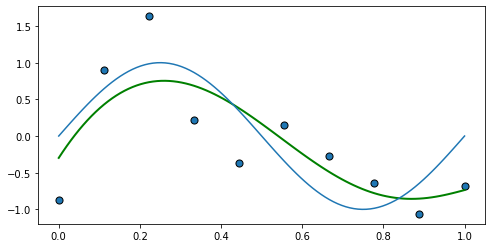

In [ ]:
ex2.predict(x_test)
ex2.plot_2()

In [28]:
class Lasso_Regression():
  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()

  def upadte_weights(self):
    Y_prediction = self.predict(self.X)
    dw = np.zeros(self.n)
    for i in range(self.n):
      if self.w[i]>0:
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 
      else :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w) + self.b

In [77]:
x_data, y_data = generateData(10, 0.5)
x_data = np.array(x_data).reshape(-1, 1)

In [78]:
x_process = np.copy(x_data)
for i in range(2, 10):
    X_i = x_data**i 
    x_process = np.concatenate((x_process, X_i), axis = 1)
x_process = np.insert(x_process, 0, [1] * x_process.shape[0], axis = 1)

In [99]:
model = Lasso_Regression(learning_rate = 0.025, no_of_iterations=1000,
                         lambda_parameter=200)

In [100]:
model.fit(x_process, y_data)

In [101]:
x_test = np.linspace(0, 1, 100)
x_test = np.array(x_test).reshape(-1, 1)
x_test_process = np.copy(x_test)
for i in range(2, 10):
    X_i = x_test**i 
    x_test_process = np.concatenate((x_test_process, X_i), axis = 1)
x_test_process = np.insert(x_test_process, 0, [1] * x_test_process.shape[0], axis = 1)

test_data_prediction = model.predict(x_test_process)

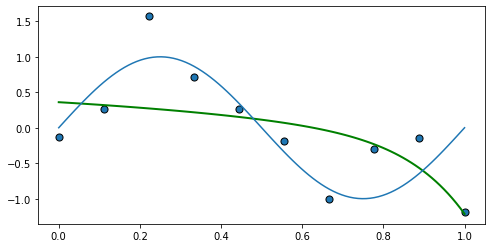

In [102]:
plt.figure(figsize= (8, 4))
plt.scatter(x_data, np.array(y_data).reshape(-1, 1), s = 50, edgecolors='black')
plt.plot(x_test, test_data_prediction, color = 'green', lw=2)
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * (np.linspace(0, 1, 100))))
plt.show()